## 向量化

![image.png](http://upload-images.jianshu.io/upload_images/5760375-e4826aa3b7195824.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

通过向量化,可以避免for循环,调用numpy使得运算加速

![image.png](http://upload-images.jianshu.io/upload_images/5760375-209d7f1554ca579d.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


目前用到的向量化的本质是点乘. 点乘会分别对元素进行聚合运算.

对各个元素进行运算,一般通过循环.

向量化可以避开循环.

### 衡量回归问题指标

## MSE
![image.png](http://upload-images.jianshu.io/upload_images/5760375-193090887e4bb436.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## RMSE
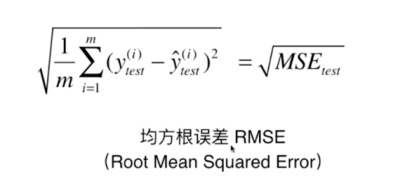

## MAE
![image.png](http://upload-images.jianshu.io/upload_images/5760375-007ad7f8da8af1cf.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## R方

![image.png](http://upload-images.jianshu.io/upload_images/5760375-c47c0f7036e9224e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

![image.png](http://upload-images.jianshu.io/upload_images/5760375-76368f2401979b69.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

![image.png](http://upload-images.jianshu.io/upload_images/5760375-275147b270e3d41d.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [2]:
boston = datasets.load_boston()

In [3]:
x = boston.data[:,5] #只使用boston房间数量这个属性

In [4]:
x.shape

(506,)

In [5]:
y = boston.target

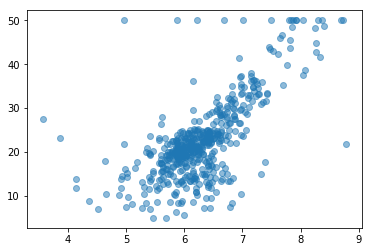

In [6]:
plt.scatter(x,y,alpha = 0.5)
plt.show()

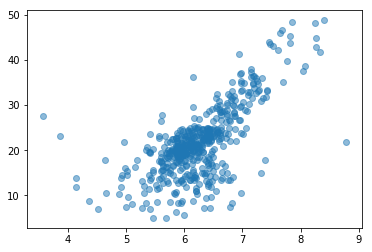

In [7]:
x = x[y<50]
y = y[y<50]
#fancy index!!!!! 注意对x用的y的索引
plt.scatter(x,y,alpha = 0.5)
plt.show()

In [8]:
#使用简单线性回归算法,用MSE(均方误差),RMSE(均方根误差),MAE(平均绝对误差)评价误差.

In [9]:
#导入简单线性回归算法

In [10]:
#split训练集与数据集
from mymodule.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,seed = 666)

In [11]:
#导入简单线性回归算法
from mymodule.SimpleLinearRegression import SimpleLinearRegression

In [12]:
reg = SimpleLinearRegression()

In [13]:
reg.fit(x_train,y_train)

SimpleLinearRegression()

In [14]:
reg.a_

7.8608543562689555

In [15]:
reg.b_

-27.459342806705543

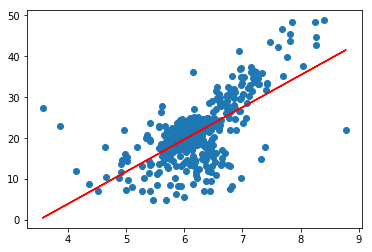

In [16]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),c= 'r')
plt.show()

In [17]:
#得到测试数据集的y_hat
y_predict = reg.predict(x_test)

### MSE

In [18]:
#注意这里使用了np.sum对向量中每一项求和,不需要循环.
mse_test = np.sum((y_predict -y_test)**2)/len(y_test)
mse_test

24.156602134387438

## RMSE

In [19]:
rmse_test = np.sqrt(np.sum((y_predict - y_test)**2)/len(y_test))
rmse_test

4.9149366358466349

## MAE

In [20]:
mae_test = np.sum(np.abs(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

## 从scikit-learn 中引入MSE MAE

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [22]:
mean_squared_error(y_test,y_predict)

24.156602134387438

In [23]:
mean_absolute_error(y_test,y_predict)

3.5430974409463873

## 计算R平方

In [24]:
1 - mean_squared_error(y_test,y_predict)/ np.var(y_test)

0.61293168039373225

In [25]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predict)

0.61293168039373236

### 向量化计算

In [6]:
from mymodule.SimpleLinearRegression import SimpleLinearRegression

In [7]:
x = np.array([1.,2,3,4,5])
y = np.array([1.,3,2,3.,5])

In [9]:
reg2 = SimpleLinearRegression()

In [10]:
reg2.fit(x,y)

SimpleLinearRegression()

In [11]:
reg2.a_

0.80000000000000004

In [12]:
reg2.b_

0.39999999999999947

In [14]:
y_hat2  = reg2.predict(x)

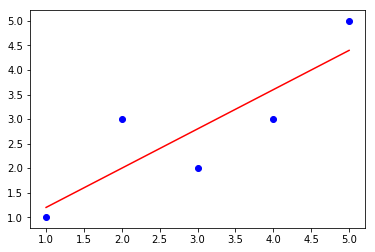

In [20]:
plt.scatter(x,y,c='b')
plt.plot(x,y_hat2,c='r')
plt.show()